## PCA(Principal Component Analysis)

PCA(Principal Component Analysis)
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화하도록 함
- 그러기 위해서는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원으로 축소하는데, 이것이 PCA의 주성분이 됨
- 즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

예: 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
- 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소
- 데이터 변동성이 큰 방향으로 축을 생성하고
- 새롭게 생성된 축으로 데이터를 투영하는 방식

PCA 수행 순서  
(1)  압력 데이터 세트의 공분산 행렬 생성  
(2) 공분산 행렬의 고유벡터와 고유값 계산  
(3) 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터 추출  
(4) 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환  

직교행렬

https://ko.wikipedia.org/wiki/%EC%A7%81%EA%B5%90%ED%96%89%EB%A0%AC


고유값 분해 :

https://ko.wikipedia.org/wiki/%EA%B3%A0%EC%9C%A0%EA%B0%92_%EB%B6%84%ED%95%B4

직교 행렬:

https://ko.wikipedia.org/wiki/%EC%A7%81%EA%B5%90%ED%96%89%EB%A0%AC

주성분분석

https://ko.wikipedia.org/wiki/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D
http://matrix.skku.ac.kr/math4ai-intro/W12/


### PCA 예제1

PCA 예제1
- 붓꽃 데이터 세트 사용
- 4개의 속성(피처) : sepal length, sepal width, petal length, petal width
- PCA 사용 차원 축소 : 4개의 속성으리 2개의 PCA 차원으로 압축
- 원본 데이터 세트와 압축된 데이터 세트 차이점 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 사이킷런 내장 데이터 셋 API 호출
from sklearn.datasets import load_iris
# 피쳐 4개
iris = load_iris()
columns = iris.feature_names
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=columns)
iris_df['target']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**sepal_length, sepal_width 두개의 속성으로 데이터 산포 시각화**

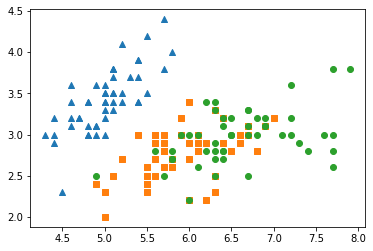

In [4]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

iris_df[iris_df['target']==0] # 'setosa'
iris_df[iris_df['target']==1] # 'versicolor'
iris_df[iris_df['target']==2] # 'virginica'

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target']==i]['sepal length (cm)']
    y = iris_df[iris_df['target']==i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris.target_names[i])
plt.show()


# plt.scatter(iris_df[iris_df['target']==0]['sepal length (cm)'], iris_df[iris_df['target']==0]['sepal width (cm)'], marker='^')
# plt.scatter(iris_df[iris_df['target']==1]['sepal length (cm)'], iris_df[iris_df['target']==1]['sepal width (cm)'], marker='s')
# plt.scatter(iris_df[iris_df['target']==2]['sepal length (cm)'], iris_df[iris_df['target']==2]['sepal width (cm)'], marker='o')



**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [5]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

In [6]:
iris_ss[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [7]:
# 4차원
iris_ss.shape

(150, 4)

**PCA 변환 수행**

스케일링이 적용된 데이터 세트에 PCA 적용
- 4차원(4개의 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
- 사이킷런의 PCA 클래스 사용
- n_components 파라미터 : PCA로 변환할 차원의 수
- fit()/transform() 호출해서 PCA 변환 수행

In [8]:
from sklearn.decomposition import PCA

# n_components: 차원의 수
pca = PCA(n_components=2)
pca.fit(iris_ss)
iris_pca = pca.transform(iris_ss)
iris_pca.shape

(150, 2)

In [9]:
# 넘파이 행렬을 DataFrame로 변환
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
iris_pca_df = pd.DataFrame(iris_pca, columns=pca_columns)
iris_pca_df['target'] = iris.target
iris_pca_df.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

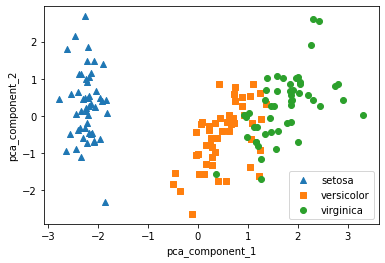

In [10]:
# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
# plt.scatter(iris_pca_df.iloc[:, 0], iris_pca_df.iloc[:, 1])
# dataframe을 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target']==i]['pca_component_1']
    y = iris_pca_df[iris_pca_df['target']==i]['pca_component_2']
    plt.scatter(x, y, marker=marker, label=iris.target_names[i])

plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.legend()
plt.show()

**각 PCA Component별 변동성 비율**

PCA Component별로 원본 데이터의 변동성 반영 정도 확인  
PCA 객체의 explained_variance_ratio_ 속성  
- 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [12]:
# 원본 붓꽃 데이터에 랜덤 포레스트 알고리즘 적용한 결과
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 iris data : 개별정확도', np.round(scores, 2))
print('원본 iris data : 평균정확도', np.round(np.mean(scores), 2))


원본 iris data : 개별정확도 [0.98 0.94 0.98]
원본 iris data : 평균정확도 0.97


In [13]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = iris_pca_df.iloc[:, :-1]
scores_pca = cross_val_score(rf_clf, pca_X, iris.target, scoring='accuracy', cv=3)
print('변환 iris data : 개별정확도', np.round(scores_pca, 2))
print('변환 iris data : 평균정확도', np.round(np.mean(scores_pca), 2))


변환 iris data : 개별정확도 [0.88 0.88 0.9 ]
변환 iris data : 평균정확도 0.89


### PCA 예제2. 신용카드 데이터 세트 PCA 변환

- 사용 데이터 : 신용카드 고객 데이터 세트 (Credit Card Clients Data Set)

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
Data Folder: default of credit card clients.xls

pca_credit_card.xls로 변경

In [14]:
# 데이터 로드 및 컬럼명 변환
# 엑셀 파일 열고 첫 행과 ID 칼럼 확인

import pandas as pd
import numpy as np

# header로 컬럼 지정, iloc로 인덱스 삭제

card_df = pd.read_excel('datasets/pca_credit_card.xls', sheet_name='Data', header=1).iloc[:, 1:]
card_df.head()

# default payment next month : 연체여부 , 0 : 정상납부, 연체 : 1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**컬럼명 변경**
- PAY_0 다음에 PAY_2 있으므로 PAY_0을 PAY_1으로 변경
- default payment next month도 default로 변경
default 칼럼을 y_target 변수로 별도 저장
default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성

In [15]:
# 칼럼명 변경

card_df.rename(columns={'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace=True)

card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
# default 칼럼을 y_target 변수로 별도 저장

y = card_df['default']
X = card_df.drop('default', axis=1)

# default 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 생성


In [17]:
# target 값 확인
y.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [18]:
# 23개의 속성
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status 
in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 

1 = payment delay for one month; 

2 = payment delay for two months; . . .; 

8 = payment delay for eight months; 

9 = payment delay for nine months and above.


X12-X17: Amount of bill statement (NT dollar).

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; . . .; 

X17 = amount of bill statement in April, 2005.


X18-X23: Amount of previous payment (NT dollar). 

X18 = amount paid in September, 2005; 

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005.

**피처간 상관도 시각화**

corr() 이용해 각 속성 간의 상관도를 구한 뒤  
heatmap으로 시각화

<AxesSubplot:>

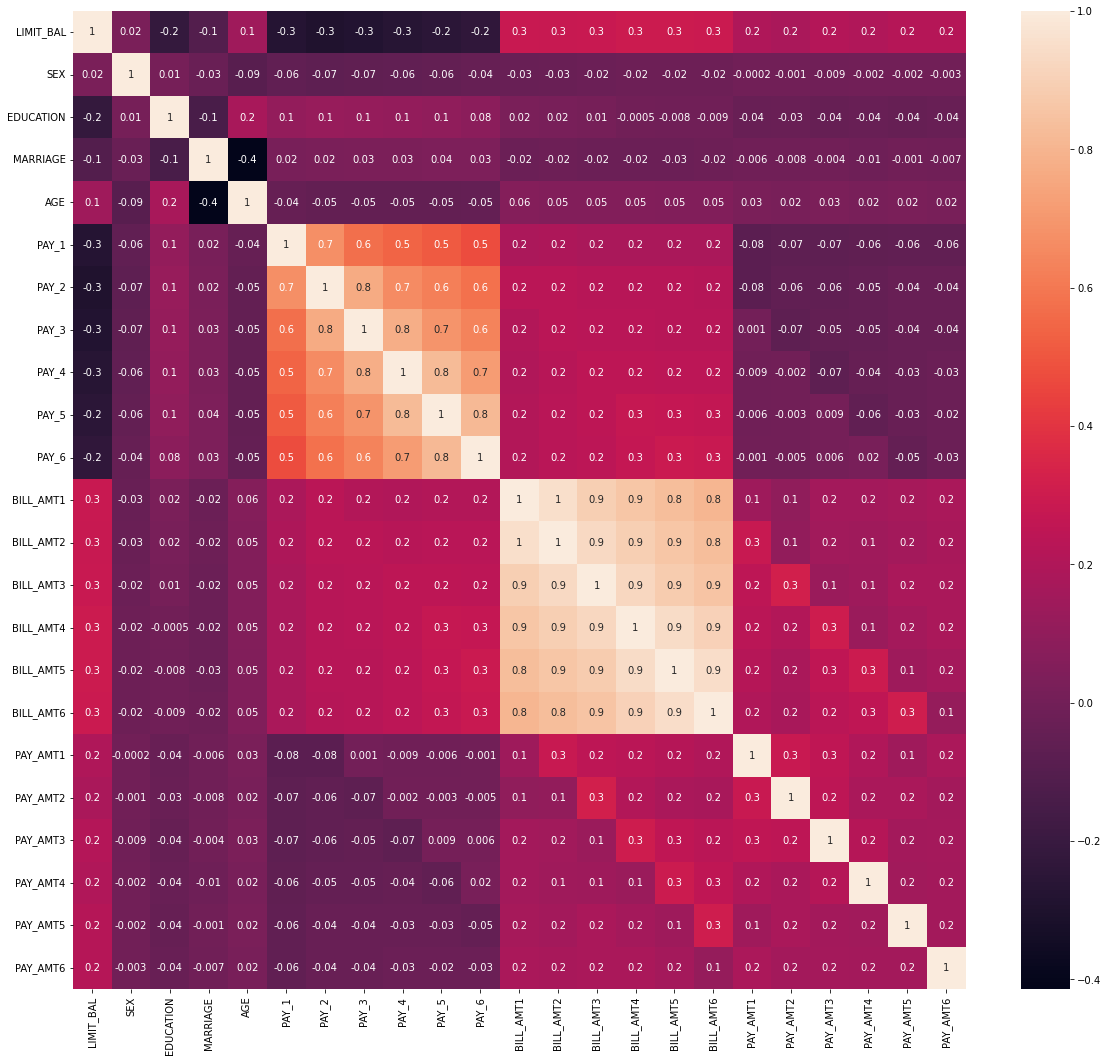

In [19]:
# corr : 상관계수
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 18))
corr = X.corr()

sns.heatmap(corr, annot=True, fmt='.1g')

**상관도가 높은 피처들의 PCA 변환 후 변동성 확인**

In [20]:
# 상관계수가 적은 것은 차원 축소
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]

ss = StandardScaler()
col_ss = ss.fit_transform(X[cols_bill])

pca = PCA(n_components=2)
pca.fit_transform(col_ss)

print('주성분 변동성 :'  ,pca.explained_variance_ratio_)

주성분 변동성 : [0.90555253 0.0509867 ]


### 상관계수 정리 : 주성분 변동성 : [0.90555253 0.0509867 ] : 1개로도 1에 가까우므로 상관계수가 높다! 6개가 1개와 비슷하다!

**분류 예측 성능 비교**
- 원본 데이터 세트
- 컴포넌트로 PCA 변환한 데이터 세트

In [21]:
# 원본 데이터 세트의 분류 예측 성능 측정
# 랜덤 포레스트 이용
# 3개의 교차 검증 세트

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=0)
scores = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=3)
print('신용카드 원본데이터 cv=3인 경우')
print('개별 정확도 : ', np.round(scores, 2))
print('편균 정확도 : ', np.round(np.mean(scores), 2))

신용카드 원본데이터 cv=3인 경우
개별 정확도 :  [0.81 0.82 0.82]
편균 정확도 :  0.82


In [22]:
# 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 성능 측정
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6개의 Component를 가진 PCA 변환 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(X_scaled)

# cross_val_score( )로 분류 예측 수행 

scores = cross_val_score(rf_clf, df_pca, y, scoring='accuracy', cv=3)
print('신용카드 PCA 변환 데이터 cv=3인 경우')
print('개별 정확도 : ', np.round(scores, 2))
print('편균 정확도 : ', np.round(np.mean(scores), 2))


신용카드 PCA 변환 데이터 cv=3인 경우
개별 정확도 :  [0.79 0.8  0.8 ]
편균 정확도 :  0.8


In [23]:
np.round(pca.explained_variance_ratio_, 3)

array([0.284, 0.178, 0.067, 0.064, 0.045, 0.042])

In [24]:
np.sum(np.round(pca.explained_variance_ratio_, 3))

0.68